In [330]:
# import modules
import pandas as pd
pd.options.display.max_colwidth=500
import tweepy
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from wordcloud import WordCloud
import nltk
import typing
nltk.download('stopwords')
nltk.download('wordnet')
import re
#Visualization packages
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
#packages to build our knn model
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.neighbors import KNeighborsClassifier

#N.B: influencers are chosen based on tweet-search and on api of twitter

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Karim\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Karim\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [283]:
     # Enter your own credentials obtained
        # from your developer account
        consumer_key = "AKJRvPwuZS686p1dxkTx3WDnV"
        consumer_secret = "MZ2dakCiJtGBzBkpfTVMFHIlPlwJjYV1bOZg5RN0qIRKxi8d6i"
        access_key = "1498368813867413505-CosP8pC5BUHY9W730ZbjcNhaA9Gk0m"
        access_secret = "eBAL5p7c4DYZVGsIPpRYHQObsAt1HEBsomcGYjUEAwT47"


In [284]:
alltweets = []
# Defining the function to get the tweets
def get_all_tweets(screen_name):
    auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
    auth.set_access_token(access_key, access_secret)
    api = tweepy.API(auth)
    new_tweets = api.user_timeline(screen_name = screen_name,count=200)
    alltweets.extend(new_tweets)
    
    oldest = alltweets[-1].id - 1
    while len(new_tweets)>0:
        new_tweets = api.user_timeline(screen_name = screen_name,count=200,max_id=oldest)
        #save most recent tweets
        alltweets.extend(new_tweets)
        #update the id of the oldest tweet less one
        oldest = alltweets[-1].id - 1
        print ("...%s tweets downloaded so far" % (len(alltweets)))                # tweet.get('user', {}).get('location', {})
 
    totaltweets = [[tweet.created_at,tweet._json["user"]["name"],tweet.user.description,tweet.user.statuses_count,tweet.entities["hashtags"],tweet.entities["user_mentions"],tweet.favorite_count,
                  tweet.lang,tweet.user.friends_count,tweet.user.followers_count,tweet.retweet_count,tweet.retweeted,tweet.text,
                  tweet._json["user"]["location"]] for tweet in alltweets]
     
    tweets_df = pd.DataFrame(columns = ["time","name","totaltweets","description","hashtags","user_mentions","favorite_count",
                                    "lang","following","followers_count","retweet_count","retweeted",
                                    "text","location"])
    tweets_df["time"]  = pd.Series([str(i[0]) for i in totaltweets])
    tweets_df["name"] = pd.Series([str(i[1]) for i in totaltweets])
    tweets_df["description"] = pd.Series([str(i[2]) for i in totaltweets])
    tweets_df["totaltweets"] = pd.Series([str(i[3]) for i in totaltweets])            
    tweets_df["hashtags"] = pd.Series([str(i[4]) for i in totaltweets])
    tweets_df["user_mentions"] = pd.Series([str(i[5]) for i in totaltweets])
    tweets_df["favorite_count"] = pd.Series([str(i[6]) for i in totaltweets])
    tweets_df["lang"] = pd.Series([str(i[7]) for i in totaltweets])
    tweets_df["following"] = pd.Series([str(i[8]) for i in totaltweets])
    tweets_df["followers_count"] = pd.Series([str(i[9]) for i in totaltweets])
    tweets_df["retweet_count"] = pd.Series([str(i[10]) for i in totaltweets])
    tweets_df["retweeted"] = pd.Series([str(i[11]) for i in totaltweets])
    tweets_df["text"] = pd.Series([str(i[12]) for i in totaltweets])
    tweets_df["location"] = pd.Series([str(i[13]) for i in totaltweets])
    tweets_df.to_csv(screen_name+"_tweets.csv")
    return tweets_df

In [285]:
olgatweets = get_all_tweets("@olgatokariuk")

...400 tweets downloaded so far
...600 tweets downloaded so far
...800 tweets downloaded so far
...1000 tweets downloaded so far
...1200 tweets downloaded so far
...1400 tweets downloaded so far
...1600 tweets downloaded so far
...1800 tweets downloaded so far
...1999 tweets downloaded so far
...2198 tweets downloaded so far
...2398 tweets downloaded so far
...2598 tweets downloaded so far
...2798 tweets downloaded so far
...2998 tweets downloaded so far
...3198 tweets downloaded so far
...3248 tweets downloaded so far
...3248 tweets downloaded so far


In [286]:
#overview of olga tweets
olgatweets.head()

,time,name,totaltweets,description,hashtags,user_mentions,favorite_count,lang,following,followers_count,retweet_count,retweeted,text,location
0,2022-05-02 12:36:23+00:00,Olga Tokariuk,18743,Independent journalist. @CEPA non-resident fellow. Disinformation researcher. Ex @Hromadske. In a special relationship with Italy,[],[],158,en,2087,404932,34,False,I know this doesn't represent Italy and Italian journalism. But I think the country should do more to investigate d… https://t.co/3GYDTLKBIf,Ukraine
1,2022-05-02 12:18:55+00:00,Olga Tokariuk,18743,Independent journalist. @CEPA non-resident fellow. Disinformation researcher. Ex @Hromadske. In a special relationship with Italy,[],"[{'screen_name': 'rete4', 'name': 'Rete 4', 'id': 3130737011, 'id_str': '3130737011', 'indices': [24, 30]}]",569,en,2087,404932,162,False,Congratulations Italian @rete4 for giving a platform to Russian foreign minister for his antisemitic propaganda. Th… https://t.co/wkTpxBENxW,Ukraine
2,2022-05-02 12:07:32+00:00,Olga Tokariuk,18743,Independent journalist. @CEPA non-resident fellow. Disinformation researcher. Ex @Hromadske. In a special relationship with Italy,"[{'text': 'StandWithUkraine', 'indices': [111, 128]}]","[{'screen_name': 'avalaina', 'name': 'Oleksandra Matviichuk', 'id': 67934675, 'id_str': '67934675', 'indices': [3, 12]}]",0,en,2087,404932,219,False,"RT @avalaina: In the Kyiv region, storks built a nest on a house destroyed during the fighting.\nPhoto UAnimals\n#StandWithUkraine https://t.…",Ukraine
3,2022-05-02 12:07:25+00:00,Olga Tokariuk,18743,Independent journalist. @CEPA non-resident fellow. Disinformation researcher. Ex @Hromadske. In a special relationship with Italy,"[{'text': 'Irpin', 'indices': [43, 49]}]","[{'screen_name': 'OlenaHalushka', 'name': 'Olena Halushka', 'id': 2749315621, 'id_str': '2749315621', 'indices': [3, 17]}]",0,und,2087,404932,337,False,"RT @OlenaHalushka: The memorial weekend in #Irpin, 2022. Absolutely unbearable. The price which Ukraine pays to save free world from the ma…",Ukraine
4,2022-05-02 12:06:21+00:00,Olga Tokariuk,18743,Independent journalist. @CEPA non-resident fellow. Disinformation researcher. Ex @Hromadske. In a special relationship with Italy,[],"[{'screen_name': 'DmytroKuleba', 'name': 'Dmytro Kuleba', 'id': 2885493519, 'id_str': '2885493519', 'indices': [3, 16]}]",0,en,2087,404932,2211,False,RT @DmytroKuleba: FM Lavrov could not help hiding the deeply-rooted antisemitism of the Russian elites. His heinous remarks are offensive t…,Ukraine


In [287]:
olgatweets.describe(exclude='number')

,time,name,totaltweets,description,hashtags,user_mentions,favorite_count,lang,following,followers_count,retweet_count,retweeted,text,location
count,3248,3248,3248,3248,3248,3248,3248,3248,3248,3248,3248,3248,3248,3248
unique,3206,1,1,1,333,923,843,20,1,3,1999,1,3248,1
top,2022-03-13 20:43:59+00:00,Olga Tokariuk,18743,Independent journalist. @CEPA non-resident fellow. Disinformation researcher. Ex @Hromadske. In a special relationship with Italy,[],[],0,en,2087,404932,1,False,"RT @DMokryk: A bunch of 🇩🇪""intellectuals"" call to make 🇺🇦surrender. Cool.\n\nWhen Russians occupy a territory, they execute civilians and est…",Ukraine
freq,3,3248,3248,3248,2889,784,2181,3072,3248,2448,59,3248,1,3248


In [288]:
olgatweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3248 entries, 0 to 3247
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   time             3248 non-null   object
 1   name             3248 non-null   object
 2   totaltweets      3248 non-null   object
 3   description      3248 non-null   object
 4   hashtags         3248 non-null   object
 5   user_mentions    3248 non-null   object
 6   favorite_count   3248 non-null   object
 7   lang             3248 non-null   object
 8   following        3248 non-null   object
 9   followers_count  3248 non-null   object
 10  retweet_count    3248 non-null   object
 11  retweeted        3248 non-null   object
 12  text             3248 non-null   object
 13  location         3248 non-null   object
dtypes: object(14)
memory usage: 355.4+ KB


In [289]:
#olga is retweeting more than using the same hashtag, moreover the hashtags used contains our main search UKraine
olgatweets['hashtags'].value_counts().loc[lambda x : x>1].to_frame()

,hashtags
[],2889
"[{'text': 'SaveMariupol', 'indices': [0, 13]}]",3
"[{'text': 'Ukraine', 'indices': [58, 66]}]",3
"[{'text': 'Mariupol', 'indices': [48, 57]}]",3
"[{'text': 'Mariupol', 'indices': [95, 104]}]",2
"[{'text': 'Russia', 'indices': [20, 27]}]",2
"[{'text': 'StopRussia', 'indices': [119, 130]}]",2
"[{'text': 'Mariupol', 'indices': [59, 68]}]",2
"[{'text': 'Mariupol', 'indices': [29, 38]}]",2
"[{'text': 'Ukraine', 'indices': [25, 33]}]",2


In [290]:
#display the most user mentions
olgatweets['user_mentions'].value_counts().loc[lambda x : x>50].to_frame()

,user_mentions
[],784
"[{'screen_name': 'KyivIndependent', 'name': 'The Kyiv Independent', 'id': 1462548977367359490, 'id_str': '1462548977367359490', 'indices': [3, 19]}]",134
"[{'screen_name': 'avalaina', 'name': 'Oleksandra Matviichuk', 'id': 67934675, 'id_str': '67934675', 'indices': [3, 12]}]",84
"[{'screen_name': 'OlenaHalushka', 'name': 'Olena Halushka', 'id': 2749315621, 'id_str': '2749315621', 'indices': [3, 17]}]",75
"[{'screen_name': 'ukraine_world', 'name': 'UkraineWorld', 'id': 873135988440223745, 'id_str': '873135988440223745', 'indices': [3, 17]}]",73


In [328]:
#which tweet got the most like
print(olgatweets['favorite_count'].max())
olgatweets.loc[olgatweets['favorite_count'] == olgatweets['favorite_count'].max()]['text']


87932


2411    Prime ministers of Poland, Czech Republic and Slovenia arrived to Kyiv today, in a powerful show of solidarity with… https://t.co/7sjveum5Xw
Name: text, dtype: object

In [329]:
#which tweet got the most retweets
#which tweet got the most like
print(olgatweets['retweet_count'].max())
olgatweets.loc[olgatweets['retweet_count'] == olgatweets['retweet_count'].max()]['text']

84159


1176    RT @lapatina_: Ukrainian mothers are writing their family contacts on the bodies of their children in case they get killed and the child su…
Name: text, dtype: object

In [293]:
sid_analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text:str, analyser,desired_type:str='pos'):
    # Get sentiment from text
    sentiment_score = analyser.polarity_scores(text)
    return sentiment_score[desired_type]

# Get Sentiment scores
def get_sentiment_scores(df,data_column):
    df[f'{data_column} Positive Sentiment Score'] = df[data_column].astype(str).apply(lambda x: get_sentiment(x,sid_analyzer,'pos'))
    df[f'{data_column} Negative Sentiment Score'] = df[data_column].astype(str).apply(lambda x: get_sentiment(x,sid_analyzer,'neg'))
    return df
#find all top scoring tweets
def print_top_n_tweets(df,data_column,number_of_rows):
    for index,row in df.nlargest(number_of_rows,data_column).iterrows():
        print(f"Score: {row[data_column]}, Tweet: {row[0]}")

In [294]:
olgatweets = get_sentiment_scores(olgatweets,'text')
tweet_sentiment = olgatweets[['text','text Positive Sentiment Score','text Negative Sentiment Score']]

In [295]:
tweet_sentiment.head()

,text,text Positive Sentiment Score,text Negative Sentiment Score
0,I know this doesn't represent Italy and Italian journalism. But I think the country should do more to investigate d… https://t.co/3GYDTLKBIf,0.000,0.000
1,Congratulations Italian @rete4 for giving a platform to Russian foreign minister for his antisemitic propaganda. Th… https://t.co/wkTpxBENxW,0.296,0.094
2,"RT @avalaina: In the Kyiv region, storks built a nest on a house destroyed during the fighting.\nPhoto UAnimals\n#StandWithUkraine https://t.…",0.000,0.251
3,"RT @OlenaHalushka: The memorial weekend in #Irpin, 2022. Absolutely unbearable. The price which Ukraine pays to save free world from the ma…",0.245,0.000
4,RT @DmytroKuleba: FM Lavrov could not help hiding the deeply-rooted antisemitism of the Russian elites. His heinous remarks are offensive t…,0.075,0.209


In [296]:
#Top positive tweets
print_top_n_tweets(tweet_sentiment,'text Positive Sentiment Score',10)

Score: 0.807, Tweet: @EU_Stoykova Beautiful!
Score: 0.796, Tweet: @ksvarnon Congratulations 👏
Score: 0.785, Tweet: @lapatina_ Love it! Lol
Score: 0.749, Tweet: @WayneJewton Yes!
Score: 0.739, Tweet: @JaneLytv A powerful piece. Thanks for sharing
Score: 0.717, Tweet: @ukrposhta FYI
Score: 0.682, Tweet: @wiczipedia @DHSgov Huge congratulations Nina, well deserved!
Score: 0.682, Tweet: @Kateryna_Kruk RIP. Heroes never die
Score: 0.672, Tweet: @NataliaAntonova Amazing makeup!
Score: 0.667, Tweet: @apolyakova What a gorgeous 😻


In [297]:
#Top negative tweets
print_top_n_tweets(tweet_sentiment,'text Negative Sentiment Score',10)

Score: 0.773, Tweet: Disgusting https://t.co/aqh1DXaaIM
Score: 0.773, Tweet: Disgusting https://t.co/UVgq98EK0Q
Score: 0.77, Tweet: RT @EtoBuziashvili: Mistake: no to war / stop war.

Correct: No to Russia's war / Russia should stop war.
Score: 0.73, Tweet: Insane https://t.co/dKS3Zw7p6U
Score: 0.697, Tweet: @Quaker_Ninja No news, unfortunately
Score: 0.688, Tweet: @VerstyukIvan No
Score: 0.683, Tweet: Totally cynical, sick attitude https://t.co/MzhSoYogTR
Score: 0.569, Tweet: Bad taste or something worse, @LouisVuitton? https://t.co/B6kDgBpCUA
Score: 0.552, Tweet: @IMatviyishyn this is horrifying 😭
Score: 0.541, Tweet: No empathy for the suffering of Ukrainians, no remorse for years of spreading anti-Ukrainian propaganda and hate. N… https://t.co/6SFYmxEFbl


In [298]:
olgatweets['retweet_count']= olgatweets['retweet_count'].astype('int64')
olgatweets['favorite_count']= olgatweets['favorite_count'].astype('int64')

In [299]:
features= olgatweets[['retweet_count','favorite_count','text Positive Sentiment Score','text Negative Sentiment Score']]
features.corr()

,retweet_count,favorite_count,text Positive Sentiment Score,text Negative Sentiment Score
retweet_count,1.000000,0.133816,-0.059607,0.027178
favorite_count,0.133816,1.000000,-0.002969,0.006816
text Positive Sentiment Score,-0.059607,-0.002969,1.000000,-0.230592
text Negative Sentiment Score,0.027178,0.006816,-0.230592,1.000000


<AxesSubplot:>

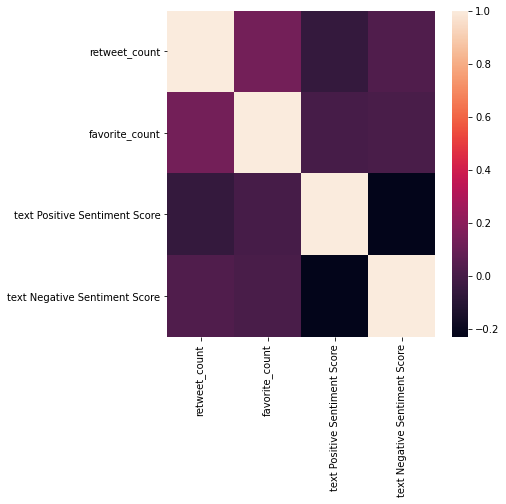

In [300]:
#correlation map
plt.figure(figsize= (6, 6))
sns.heatmap(features.corr())

In [301]:
 #Import english stop words

stopcorpus: typing.List = stopwords.words('english')

In [302]:
# Convert to lowercase, and remove stop words

def remove_links(text):
    # Remove any hyperlinks that may be in the text starting with http
    return re.sub(r"http\S+", "", text)

def style_text(text:str):
    # Convert to lowercase
    return text.lower()

def remove_words(text_data:str,list_of_words_to_remove: typing.List):
    # Remove all words as specified in a custom list of words
    return [item for item in text_data if item not in list_of_words_to_remove]

def collapse_list_to_string(string_list):
    # This is to join back together the text data into a single string
    return ' '.join(string_list)

def remove_apostrophes(text):
    # Remove any apostrophes as these are irrelavent in our word cloud
    text = text.replace("'", "")
    text = text.replace('"', "")
    text = text.replace('`', "")
    return text

def remove_others(text):
    
    text = re.sub(r'@[A-Za-z0-9]+','',text) # Remove @mentions
    text = re.sub(r'#','',text) # Remove hashtag symbols
    text = re.sub(r'RT[\s]+','',text) # Remove retweets
    text = re.sub(r'Ukraine','',text) 
    text = re.sub(r'ukraine','',text) 
    text = re.sub(r'ukrainian','',text)
    text = re.sub(r'amp','',text)
    text = re.sub(r'rt','',text)
    text = re.sub(r'Russia','',text) 
    text = re.sub(r'russia','',text) 
    return text

In [303]:
tweet_sentiment['cleaned_text'] = tweet_sentiment.loc[:,'text'].astype(str).apply(remove_links)

tweet_sentiment['cleaned_text'] = tweet_sentiment['cleaned_text'].astype(str).apply(style_text)

tweet_sentiment['cleaned_text'] = tweet_sentiment['cleaned_text'].astype(str).apply(lambda x: remove_words(x.split(),stopcorpus))

tweet_sentiment['cleaned_text'] = tweet_sentiment['cleaned_text'].apply(collapse_list_to_string)

tweet_sentiment['cleaned_text'] = tweet_sentiment['cleaned_text'].apply(remove_apostrophes)

tweet_sentiment['cleaned_text'] = tweet_sentiment['cleaned_text'].apply(remove_others)

<ipython-input-303-2ade89cc017e>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-303-2ade89cc017e>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-303-2ade89cc017e>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-303-2ad

In [304]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]


tweet_sentiment['clean_lemmatized'] = tweet_sentiment['cleaned_text'].astype(str).apply(lemmatize_text)

tweet_sentiment['clean_lemmatized'] = tweet_sentiment['clean_lemmatized'].apply(collapse_list_to_string)

display(tweet_sentiment['clean_lemmatized'].head(5))

<ipython-input-304-3e2f8e3d0251>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-304-3e2f8e3d0251>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0                             know represent italy italian journalism. think country investigate d…
1             congratulation italian giving platform n foreign minister antisemitic propaganda. th…
2                : kyiv region, stork built nest house destroyed fighting. photo uanimals standwith
3              : memorial weekend irpin, 2022. absolutely unbearable. price pay save free world ma…
4    : fm lavrov could help hiding deeply-rooted antisemitism n elites. heinous remark offensive t…
Name: clean_lemmatized, dtype: object

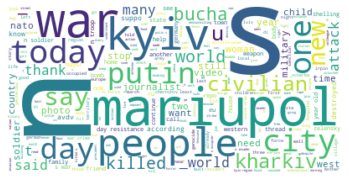

In [305]:
def plot_wordcloud(series,output_filename='wordcloud'):

    wordcloud = WordCloud(max_font_size=150, max_words=500, background_color="white").generate(' '.join(series.astype(str)))

    wordcloud.to_file(output_filename + '.png')

    plt.imshow(wordcloud, interpolation='bilinear')

    plt.axis("off")

plot_wordcloud(tweet_sentiment['clean_lemmatized'],'overall-wordcloud')

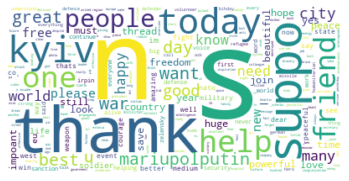

In [306]:
def plot_wordcloud_top_n(df,number_of_tweets,score_column,data_column,output_filename):
    sliced_df = df.nlargest(number_of_tweets,score_column)

    plot_wordcloud(sliced_df[data_column],output_filename)


plot_wordcloud_top_n(tweet_sentiment,500,'text Positive Sentiment Score','clean_lemmatized','positive-wordcloud')

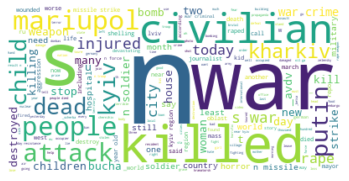

In [307]:
plot_wordcloud_top_n(tweet_sentiment,500,'text Negative Sentiment Score','clean_lemmatized','negative-wordcloud')

In [331]:
#retweets distribution over time
fig = px.line(olgatweets, x="time", y= olgatweets['retweet_count'])
fig.update_xaxes(
    dtick="M1",
    tickformat="%b\n%Y",
    ticklabelmode="period")
fig.show()

In [309]:
df=olgatweets[['time', 'retweet_count','text Positive Sentiment Score','text Negative Sentiment Score']]
pos=olgatweets[['time', 'retweet_count','text Positive Sentiment Score']]
neg =olgatweets[['time', 'retweet_count','text Negative Sentiment Score']]
df[(df['time']>='2022-03-01') & (df['time']<='2022-04-01')]

,time,retweet_count,text Positive Sentiment Score,text Negative Sentiment Score
1415,2022-03-31 17:00:06+00:00,536,0.093,0.000
1416,2022-03-31 16:20:44+00:00,1117,0.130,0.000
1417,2022-03-31 16:16:14+00:00,3161,0.000,0.000
1418,2022-03-31 16:15:04+00:00,712,0.247,0.086
1419,2022-03-31 16:02:55+00:00,198,0.185,0.000
...,...,...,...,...
3243,2022-03-06 14:00:18+00:00,1415,0.000,0.333
3244,2022-03-06 14:00:00+00:00,7459,0.113,0.000
3245,2022-03-06 13:45:02+00:00,486,0.516,0.000
3246,2022-03-06 13:38:13+00:00,418,0.174,0.000


In [332]:
#how retweets via sentiments are having an evolution over time
fig = go.Figure()
for col in pos.columns:
    fig.add_trace(go.Scatter(x=pos['time'], y=pos['text Positive Sentiment Score'],
                             name = col,
                             mode = 'markers+lines',
                             line=dict(shape='linear'),
                             connectgaps=True,
                             line_color='green'
                             )
                 )
for col in neg.columns:
    fig.add_trace(go.Scatter(x=neg['time'], y=neg['text Negative Sentiment Score'],
                             name = col,
                             mode = 'markers+lines',
                             line=dict(shape='linear'),
                             connectgaps=True,
                             line_color='red'
                             )
                 )
fig.show()

In [311]:
import numpy as np
olgatweets["is_viral"] = olgatweets.retweet_count.apply(
    lambda row: 1 if row >= olgatweets.retweet_count.mean()  else 0)

print(olgatweets.is_viral.value_counts())

0    2383
1     865
Name: is_viral, dtype: int64


In [312]:
olgatweets['tweet_length'] = olgatweets.apply(lambda tweet: len(tweet['text']), axis=1)
olgatweets["followers_count"] = olgatweets.apply(lambda tweet: tweet["followers_count"], axis=1)
olgatweets["friends_count"] = olgatweets.apply(lambda tweet: tweet["following"], axis=1)

olgatweets["hashtag_count"] = olgatweets.apply(lambda tweet: tweet.text.count("#"), axis=1)
olgatweets["link_count"] = olgatweets.apply(lambda tweet: tweet.text.count("http"), axis=1)
olgatweets["word_count"] = olgatweets.apply(lambda tweet: len(tweet.text.split()), axis=1)

def find_avg_word_length(str):
    #function to find average word length of a string
    sum = 0
    for i in range(0, len(str.split())):
        sum = sum + len(str.split()[i])
    avg = sum/len(str.split())
    return avg

olgatweets["avg_length_of_words"] = olgatweets.text.apply(find_avg_word_length)


In [313]:
labels = olgatweets[["is_viral"]]
features = olgatweets[["tweet_length", "followers_count", "friends_count",'text Positive Sentiment Score','text Negative Sentiment Score']]
scaled_features = scale(features, axis=0)

features2 = olgatweets[["tweet_length", "followers_count", "friends_count", "hashtag_count", "link_count", "word_count", "favorite_count"]]
scaled_features2 = scale(features2, axis=0)

features3 = olgatweets[["tweet_length", "followers_count", "friends_count", "hashtag_count", "link_count", "word_count", "favorite_count",'text Positive Sentiment Score','text Negative Sentiment Score']]
scaled_features3 = scale(features3, axis=0)

print(features.loc[0])
print(scaled_features[0])

tweet_length                        140
followers_count                  404932
friends_count                      2087
text Positive Sentiment Score       0.0
text Negative Sentiment Score       0.0
Name: 0, dtype: object
[ 0.40604161  0.17371706  0.         -0.63089881 -0.87019149]


In [314]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_labels, test_labels = train_test_split(scaled_features3, labels, 
                                                                    test_size = 0.2,
                                                                    random_state=1)

In [315]:
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(train_data, train_labels)
classifier.score(test_data, test_labels)

C:\Users\Karim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



0.7138461538461538

C:\Users\Karim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Karim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Karim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Karim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Karim\anaconda3\lib\sit

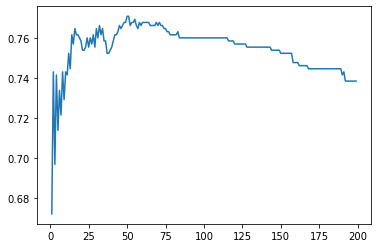

In [316]:
scores = []

for k in range(1, 200):
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(train_data, train_labels)
    scores.append(classifier.score(test_data, test_labels))

plt.plot(range(1,200), scores)
plt.show()

C:\Users\Karim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Karim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Karim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Karim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Karim\anaconda3\lib\sit

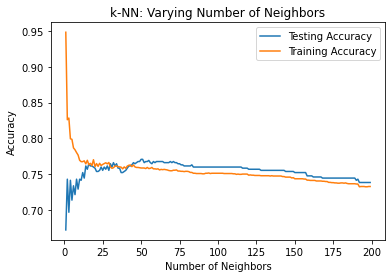

In [317]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 200)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
# Loop over different values of k
for i, k in enumerate(neighbors):
 # Setup a k-NN Classifier with k neighbors: knn
 knn = KNeighborsClassifier(n_neighbors=k)
 # Fit the classifier to the training data
 knn.fit(train_data, train_labels)
 
 #Compute accuracy on the training set
 train_accuracy[i] = knn.score(train_data, train_labels)
 #Compute accuracy on the testing set
 test_accuracy[i] = knn.score(test_data, test_labels)
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [318]:
#lets find best_k

best_score = 0
best_k = 0

for k in range(1, 200):
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(train_data, train_labels)
    if classifier.score(test_data, test_labels) > best_score:
        best_score = classifier.score(test_data, test_labels)
        best_k = k

print(best_k)
print(best_score)

C:\Users\Karim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Karim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Karim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Karim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Karim\anaconda3\lib\sit

50
0.7707692307692308


In [333]:
df.to_csv('olgatweets.csv')